In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sal = pd.read_csv('Salaries.csv')

In [3]:
#first we find the info of a csv file
sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
#we check how many null values we have
sal.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [5]:
#drop Notes and Status cuz it did'nt contains single value
sal.drop(['Notes' ,'Status'], axis = 1 , inplace = True)

In [6]:

sal.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [7]:
#replace BasePay null values with 0
sal['BasePay'] = (sal['BasePay'].fillna(0))

In [8]:
#replace OvertimePay null values with his median
sal['OvertimePay'] = (sal['OvertimePay'].fillna(sal['OvertimePay'].median()))

In [11]:
#replace OtherPay null values with his median
sal['OtherPay'] = (sal['OtherPay'].fillna(sal['OtherPay'].median()))

In [12]:
#replace Benefits null values with his median
sal['Benefits'] = (sal['Benefits'].fillna(0))

In [13]:
#check again if we contain any null values
sal.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [14]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.690945,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.506915,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.270000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [15]:
#check how many persons have pay less than 0 which is impossible 
(sal[['BasePay' , 'OvertimePay' , 'OtherPay' , 'Benefits']] <0).sum()

BasePay        11
OvertimePay     1
OtherPay        5
Benefits        4
dtype: int64

In [22]:
#so we convert nagative values with np.nan
sal[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay' , 'TotalPayBenefits']] = sal[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay' , 'TotalPayBenefits']].map(lambda x: np.nan if x < 0 else x)


In [23]:
(sal[['BasePay' , 'OvertimePay' , 'OtherPay' , 'Benefits']] <0).sum()

BasePay        0
OvertimePay    0
OtherPay       0
Benefits       0
dtype: int64

In [24]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148643.000000,148653.000000,148649.000000,148650.000000,148653.000000,148650.000000,148654.000000
mean,74327.500000,66058.623916,5065.957647,3648.866034,18924.742462,74768.829102,93695.080429,2012.522643
std,42912.857795,42884.523358,11454.287585,8056.569942,17165.229296,50516.796790,62792.490716,1.117538
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,37164.250000,32810.130000,0.000000,0.000000,0.000000,36169.280000,44073.337500,2012.000000
50%,74327.500000,64864.890000,0.000000,811.330000,23217.135000,71427.040000,92406.020000,2013.000000
75%,111490.750000,94611.000000,4657.650000,4236.080000,33468.980000,105839.900000,132877.992500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [25]:
sal['JobTitle'].nunique()

2159

In [33]:
sal['Agency'].value_counts().head()

Agency
San Francisco    148654
Name: count, dtype: int64

In [31]:
sal['Year'].sort_values().unique()

array([2011, 2012, 2013, 2014])

In [34]:
#check the top 10 jobs according to pay
sal['JobTitle'].value_counts().head(10)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: count, dtype: int64

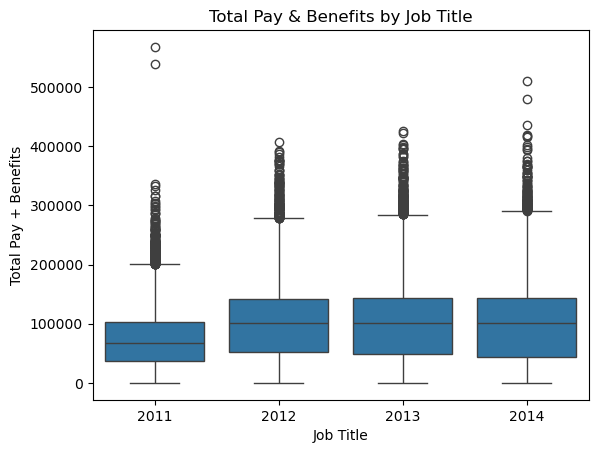

In [64]:
#Created and saved a boxplot showing Total Pay & Benefits distribution across years with labeled axes and title
ax = sns.boxplot(x = 'Year' , y = 'TotalPayBenefits' , data = sal)
ax.set_title("Total Pay & Benefits by Job Title")
ax.set_xlabel("Job Title")
ax.set_ylabel("Total Pay + Benefits")
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.show()

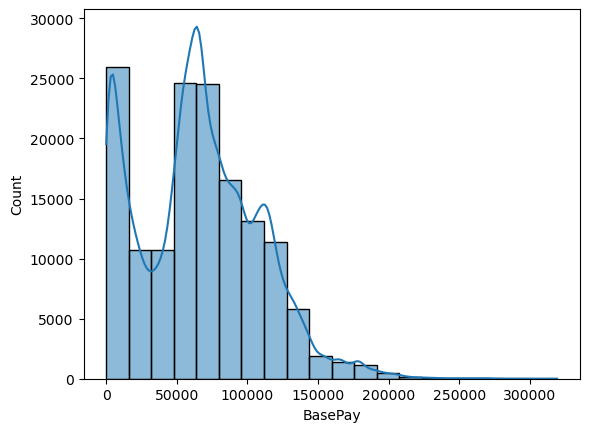

In [63]:
#Plotted and saved a histogram of BasePay with 20 bins and a KDE curve to show its distribution
sns.histplot(sal['BasePay'] , bins = 20 , kde = True)
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.show()

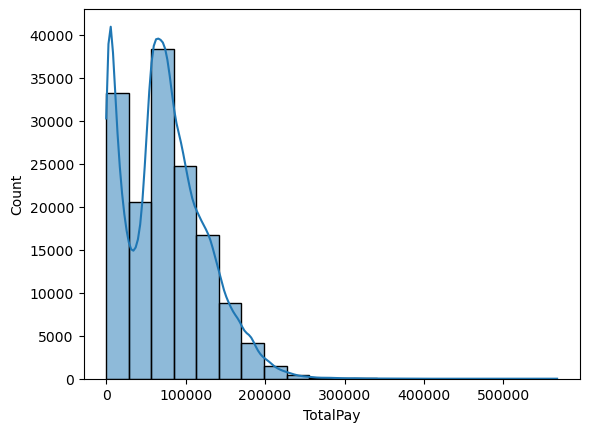

In [62]:
#Plotted and saved a histogram of TotalPay with 20 bins and a KDE curve to visualize its distribution
sns.histplot(sal['TotalPay'] , bins = 20 , kde = True)
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [46]:
#Displayed the top 10 employees with the highest Total Pay & Benefits from the dataset
sal[['EmployeeName' , 'TotalPayBenefits']].nlargest(10 , 'TotalPayBenefits')

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
110531,David Shinn,510732.68
110532,Amy P Hart,479652.21
110533,William J Coaker Jr.,436224.36
72925,Gregory P Suhr,425815.28
72926,Joanne M Hayes-White,422353.40
110534,Gregory P Suhr,418019.22
110535,Joanne M Hayes-White,417435.10
110536,Ellen G Moffatt,415767.94


In [48]:
#Calculated and displayed the top 10 job titles with the highest average Total Pay & Benefits
sal.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending = False).head(10)

JobTitle
Chief Investment Officer                          436224.360000
Chief of Police                                   411732.266667
Chief, Fire Department                            408865.326667
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Gen Mgr, Public Trnsp Dept                        380696.440000
Dep Dir for Investments, Ret                      355731.260000
Mayor                                             354212.906667
Adm, SFGH Medical Center                          347079.706667
Controller                                        343061.140000
Asst Chf of Dept (Fire Dept)                      342597.550556
Name: TotalPayBenefits, dtype: float64

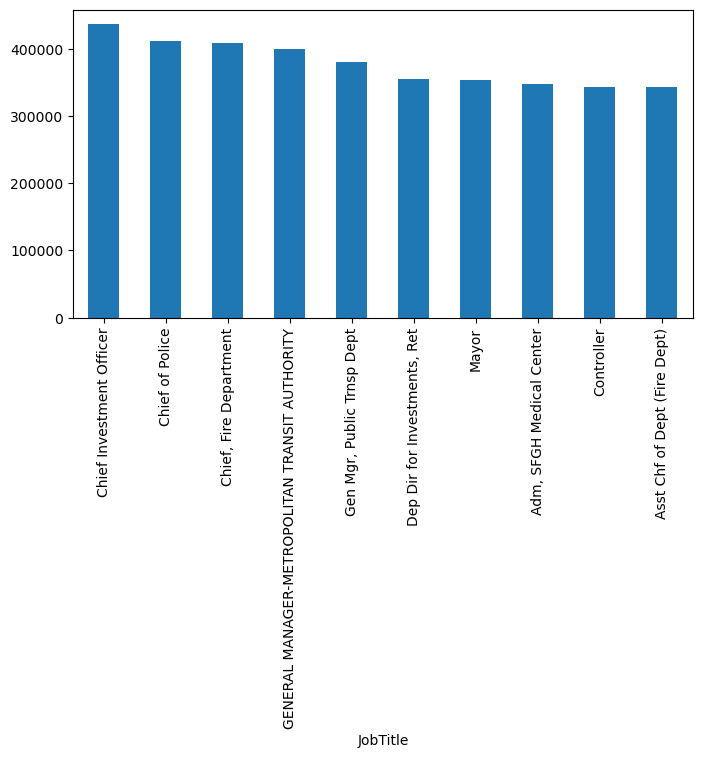

In [61]:
#Plotted and saved a bar chart of the top 10 job titles with the highest average Total Pay & Benefits.
sal.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending = False).head(10).plot(kind='bar' , figsize=(8,4))
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.show()

In [51]:
sal.groupby('Year')['TotalPayBenefits'].mean()

Year
2011     71744.103871
2012    100553.229232
2013    101448.613919
2014    100253.564837
Name: TotalPayBenefits, dtype: float64

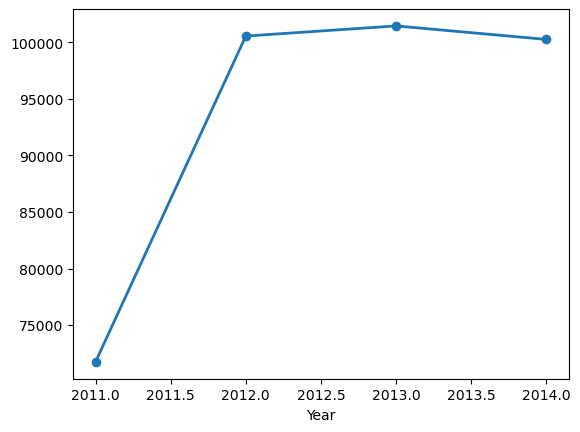

In [60]:
#Plotted and saved a line chart showing the trend of average Total Pay & Benefits over the years.
sal.groupby('Year')['TotalPayBenefits'].mean().plot(marker='o', linestyle='-', linewidth=2)
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.show()

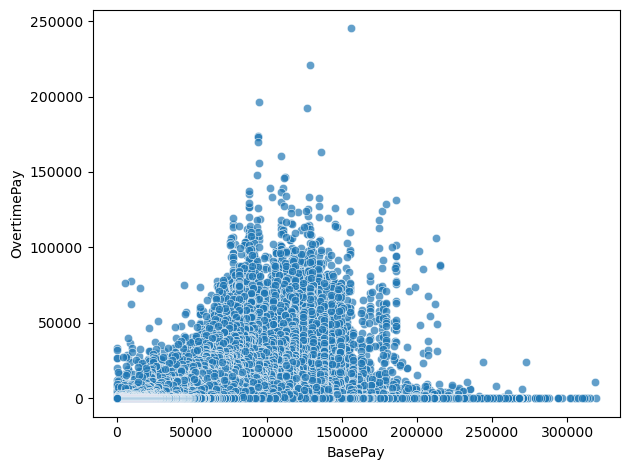

In [59]:
#Plotted and saved a scatter plot showing the relationship between BasePay and OvertimePay with transparency set to 0.7
sns.scatterplot(x = 'BasePay' , y = 'OvertimePay' ,data = sal , alpha = 0.7)
plt.savefig("basepay_hist.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()